# 미니 프로젝트 (1)
- 관련 사이트: https://dacon.io/competitions/open/235536/data

- 과제: 지금까지 배운 pandas 코드를 통해 유의미한 결과 5개 이상 출력하고, 그래프 그리기 (데이터 전처리는 예시 참고)

  조건: 변수 2개 이상 연결한 결과값 포함

* 위의 주소에서 데이터를 다운받은 후, 사이트의 내용을 참고하여 새로 알고자 하는 내용으로 데이터를 분석하시면 됩니다. 분석은 train.csv 파일만을 이용하시면 됩니다.

* 분석 파일을 github에 업로드 후 링크를 과제함에 댓글로 달아주시면 됩니다.

* 데이터 전처리 및 분석 예시는 카페에 업로드 되어 있으니 참고 바랍니다.

* 제출기한: 2021.10.08 (금) 23:59

# **1. 라이브러리 및 데이터**


In [1]:
# matplotlib 한글 깨짐방지
# 아래코드 실행후 '런타임 다시시작' 후 모듈 불러오기
# 참고 블로그: https://teddylee777.github.io/colab/colab-korean 
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') #matplotlib 한글 깨짐 방지

import warnings
warnings.filterwarnings(action='ignore')

In [3]:
# train 데이터 불러오기
train=pd.read_csv("movies_train.csv")

# **2. 탐색적 자료분석(EDA)**



## 1) 일부 데이터 미리보기


+ title : 영화의 제목
+ distributor : 배급사
+ genre : 장르
+ release_time : 개봉일
+ time : 상영시간(분)
+ screening_rat : 상영등급
+ director : 감독이름
+ dir_prev_bfnum : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화에서의 평균 관객수(단 관객수가 알려지지 않은 영화 제외)
+ dir_prev_num : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화의 개수(단 관객수가 알려지지 않은 영화 제외)
+ num_staff : 스텝수
+ num_actor : 주연배우수
+ box_off_num : 관객수

In [4]:
train.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387


In [5]:
train.tail()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
595,해무,(주)NEW,드라마,2014-08-13,111,청소년 관람불가,심성보,3833.0,1,510,7,1475091
596,파파로티,(주)쇼박스,드라마,2013-03-14,127,15세 관람가,윤종찬,496061.0,1,286,6,1716438
597,살인의 강,(주)마운틴픽쳐스,공포,2010-09-30,99,청소년 관람불가,김대현,NaN,0,123,4,2475
598,악의 연대기,CJ 엔터테인먼트,느와르,2015-05-14,102,15세 관람가,백운학,NaN,0,431,4,2192525
599,베를린,CJ 엔터테인먼트,액션,2013-01-30,120,15세 관람가,류승완,NaN,0,363,5,7166532


## 2) 데이터 요약


In [6]:
print(train.shape)

(600, 12)


- 600개의 데이터로 학습 시키고 243개의 영화의 관객수를 예측해야 한다. test에는 12개의 열이 있고 test에는 관객수(box_off_num)를 제외한 11개의 열이 존재한다.


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           600 non-null    object 
 1   distributor     600 non-null    object 
 2   genre           600 non-null    object 
 3   release_time    600 non-null    object 
 4   time            600 non-null    int64  
 5   screening_rat   600 non-null    object 
 6   director        600 non-null    object 
 7   dir_prev_bfnum  270 non-null    float64
 8   dir_prev_num    600 non-null    int64  
 9   num_staff       600 non-null    int64  
 10  num_actor       600 non-null    int64  
 11  box_off_num     600 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 56.4+ KB


## 3) 데이터의 요약통계량 확인

In [8]:
#실수는 소수점 첫째자리까지 출력 옵션
pd.options.display.float_format = '{:.1f}'.format

In [9]:
#숫자형 변수 요약 통계량
train.describe()

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
count,600.0,270.0,600.0,600.0,600.0,600.0
mean,100.9,1050442.9,0.9,151.1,3.7,708181.8
std,18.1,1791408.3,1.2,165.7,2.4,1828005.9
min,45.0,1.0,0.0,0.0,0.0,1.0
25%,89.0,20380.0,0.0,17.0,2.0,1297.2
50%,100.0,478423.6,0.0,82.5,3.0,12591.0
75%,114.0,1286568.6,2.0,264.0,4.0,479886.8
max,180.0,17615314.0,5.0,869.0,25.0,14262766.0


## 4) 결측치 확인 및 데이터 전처리


In [10]:
train.isna().sum()

title               0
distributor         0
genre               0
release_time        0
time                0
screening_rat       0
director            0
dir_prev_bfnum    330
dir_prev_num        0
num_staff           0
num_actor           0
box_off_num         0
dtype: int64

- train에서 dir_prev_bfnum 변수에 결측값이 존재한다. 
- 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화에서의 평균 관객수 중 관객수가 알려지지 않은 영화가 없는 것으로 보임

In [11]:
# 결측값의 특성 확인
train[train['dir_prev_bfnum'].isna()].head(3)

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
6,길위에서,백두대간,다큐멘터리,2013-05-23,104,전체 관람가,이창재,NaN,0,32,5,53526
8,"1789, 바스티유의 연인들",유니버설픽쳐스인터내셔널코리아,뮤지컬,2014-09-18,129,전체 관람가,정성복,NaN,0,3,5,4778


In [12]:
#train에서 dir_prev_bfnum이 결측값인 데이터의 dir_prev_num열의 값
print(train[train['dir_prev_bfnum'].isna()]['dir_prev_num'].sum())

0


- train에서 dir_prev_bfnum이 결측값으로 존재하는 데이터들은 전부 dir_prev_num이 0인 영화들이다. 즉, 감독의 이전작품이 존재 하지 않은 경우이다. 따라서 dir_prev_bfnum에 있는 결측값은 전부 0으로 채운다.

In [13]:
train['dir_prev_bfnum'].fillna(0, inplace=True)

- release_time은 시간에 관련된 데이터인데 int형으로 인식되고 있다. release_time을 datetime형식으로 변환한다.

In [14]:
train['release_time']=pd.to_datetime(train['release_time'])

## 5) 데이터 시각화 및 분석

### 5-1) 상영 등급에 따른 관객수 간의 관계: 상영 등급에 따라 관객 수의 차이를 보이는가?

In [15]:
train.groupby('screening_rat')['box_off_num'].mean().sort_values(ascending=False)

screening_rat
15세 관람가    1247518.6
12세 관람가     844980.9
청소년 관람불가    364181.3
전체 관람가      135100.5
Name: box_off_num, dtype: float64

Text(0.5, 1.0, '상영등급별 평균 관객수')

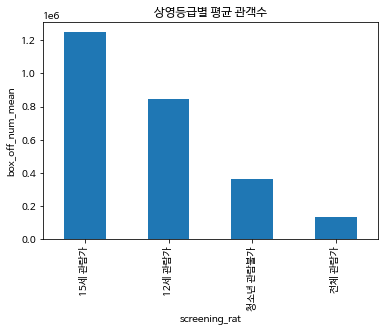

In [16]:
train.groupby('screening_rat')['box_off_num'].mean().sort_values(ascending=False).plot(kind='bar')
plt.ylabel('box_off_num_mean')
plt.title('상영등급별 평균 관객수')

- 15세 관람가 > 12세 관람가 > 청소년 관람불가 > 전체 관람가 순으로 평균 관객 수가 많다.
- 영화를 관람할 수 있는 연령 많다고 해서 무조건 많은 관람가 수를 의미하는 것이 아니다.
- 전체 관람가 영화 주제: 사회나 가족의 긍정적 가치나 의미 등을 알려주고, 건전한 가치관 형성에 도움을 주는 것, 아동에게 위협이나 위험을 느끼게 하는 유해한 내용 없는 것 -> 부모님 외의 성인이 관람할 가능성 적음 

### 5-2) 주연배우수와 스텝수 간의 관계: 많은 주연배우 수는 많은 스텝 수를 의미하는가?

In [18]:
#주연배우수 별 스텝수의 평균
actor_staff = train.groupby('num_actor')['num_staff'].mean()
actor_staff = actor_staff.reset_index()
actor_staff.head()

,num_actor,num_staff
0,0,6.2
1,1,56.1
2,2,154.3
3,3,167.2
4,4,157.2


Text(0.5, 1.0, '주연배우 수 별 스텝 수의 평균')

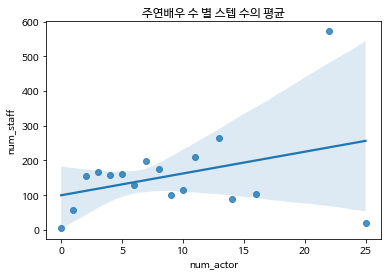

In [19]:
sns.regplot(x='num_actor', y='num_staff', data=actor_staff)
plt.title('주연배우 수 별 스텝 수의 평균')

- 많은 주연배우 수가 무조건적으로 많은 스텝 수를 의미하는 것은 아님. 하지만 회귀 선을 봤을 때, 어느정도의 양의 상관관계를 나타냄을 알 수 있음.

### 5-3) 장르별 상영시간의 관계: 장르에 따라 상영시간의 차이를 보이는가?

In [20]:
train[['genre','time']].groupby('genre').mean()

,time
genre,
SF,101.4
공포,100.2
느와르,115.4
다큐멘터리,88.1
드라마,104.7
멜로/로맨스,96.6
뮤지컬,107.0
미스터리,102.6
서스펜스,112.0


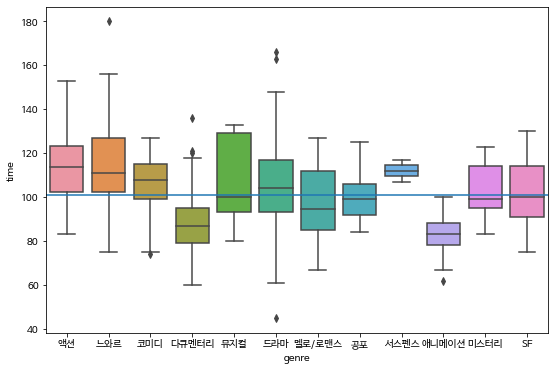

In [21]:
plt.figure(figsize=(9,6))
sns.boxplot(x=train['genre'],y=train['time']).axhline(train['time'].mean())

- 상영시간의 우열을 명확하게 나누기는 어렵지만, 다큐멘터리와 애니메이션 장르의 영화는 평균 상영 시간보다 상대적으로 짧다.

### 5-4) 장르별 스텝 수의 차이: 장르의 특성에 따라 스텝 수가 더 많이 혹은 적게 필요로 하는가?

In [22]:
train[['genre','num_staff']].groupby('genre').mean()

,num_staff
genre,
SF,197.3
공포,176.4
느와르,311.1
다큐멘터리,17.8
드라마,164.5
멜로/로맨스,135.8
뮤지컬,2.2
미스터리,117.4
서스펜스,111.0


Text(0.5, 1.0, '장르별 평균 스텝 수')

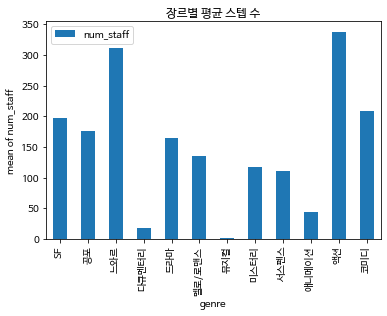

In [23]:
train[['genre','num_staff']].groupby('genre').mean().plot(kind='bar')
plt.ylabel('mean of num_staff')
plt.title('장르별 평균 스텝 수')

In [24]:
train['num_staff'].mean()

151.11833333333334

- 액션과 느와르 장르의 영화는 제작에 비교적 많은 스탭이 필요하다. 이는 영화당 평균 스탭 수의 2배 이상이다.
- 다큐멘터리와 뮤지컬 장르의 영화는 적은 수의 스탭을 필요로 한다.

### 5-5) 배급사별 관객 수: 어떤 배급사가 가장 대중성 있는 영화를 배급하였는가?

In [25]:
train[['distributor','box_off_num']].groupby('distributor').mean().sort_values(by='box_off_num',ascending=False).head(10)

,box_off_num
distributor,
CJ E&M Pictures,4122337.0
(주)쇼박스,3386656.3
(주)아이필름코퍼레이션,3117859.0
쇼박스(주)미디어플렉스,2634823.0
영구아트무비,2541603.0
CJ E&M 영화부문,2505309.3
(주)NEW,2184404.8
CJ 엔터테인먼트,2162742.5
이십세기폭스코리아(주),1637046.0


Text(0.5, 1.0, '평균 관객 수 top10 배급사')

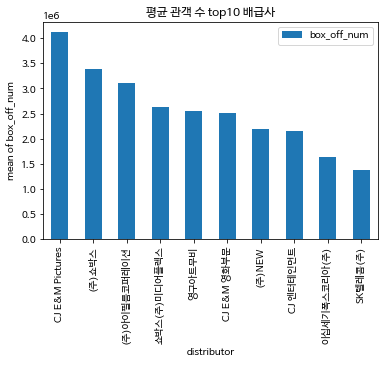

In [26]:
train[['distributor','box_off_num']].groupby('distributor').mean().sort_values(by='box_off_num',ascending=False).head(10).plot(kind='bar')
plt.ylabel('mean of box_off_num')
plt.title('평균 관객 수 top10 배급사')

- CJ E&M Pictures > (주)쇼박스 > (주)아이필름코퍼레이션 > 쇼박스(주)미디어플렉스 > 영구아트무비 > ... 순으로 가장 대중성 있는 영화를 배급하였다.
- 평소에 많이 들어본, 대기업 회사에서 배급한 영화의 평균 관객 수가 가장 많음을 확인할 수 있다.

### 5-6) 장르별 주요 배급사

In [27]:
#장르 별 영화 수
train['genre'].value_counts()

드라마       221
다큐멘터리      93
멜로/로맨스     78
코미디        53
공포         42
액션         28
느와르        27
애니메이션      21
미스터리       17
SF         13
뮤지컬         5
서스펜스        2
Name: genre, dtype: int64

In [28]:
#장르별로 배급사에서 배급한 영화의 수
genre_distributor = train[['genre','distributor']].groupby(['genre', 'distributor']).size()
genre_distributor = genre_distributor.reset_index()
genre_distributor.rename(columns={0:'count'},inplace=True)
genre_distributor

,genre,distributor,count
0,SF,(주) 영화사조제,1
1,SF,(주)NEW,1
2,SF,(주)더픽쳐스,1
3,SF,(주)랠리버튼,1
4,SF,(주)유비콘텐츠,1
...,...,...,...
303,코미디,영화사 진진,2
304,코미디,이십세기폭스코리아(주),1
305,코미디,인디플러그,1
306,코미디,타임스토리그룹,1


In [29]:
genre_distributor.loc[genre_distributor.groupby(['genre'])['count'].idxmax()] #idxmax는 설정한 칼럼에서 최대값을 가진 행 전체를 출력. 단, 중복시 그 중 첫번째 행만 출력.

,genre,distributor,count
6,SF,CJ 엔터테인먼트,3
25,공포,롯데엔터테인먼트,6
42,느와르,(주)쇼박스,8
80,다큐멘터리,시네마달,9
120,드라마,CJ 엔터테인먼트,20
185,멜로/로맨스,(주) 케이알씨지,12
228,뮤지컬,(주) 영화사조제,1
236,미스터리,CJ 엔터테인먼트,3
244,서스펜스,(주)팝 파트너스,1
250,애니메이션,CJ 엔터테인먼트,4


In [30]:
#print(genre_distributor[(genre_distributor['genre']=='SF') & (genre_distributor['count']==3)])
#print(genre_distributor[(genre_distributor['genre']=='공포') & (genre_distributor['count']==6)])
#print(genre_distributor[(genre_distributor['genre']=='느와르') & (genre_distributor['count']==8)])
#print(genre_distributor[(genre_distributor['genre']=='다큐멘터리') & (genre_distributor['count']==9)])
#print(genre_distributor[(genre_distributor['genre']=='드라마') & (genre_distributor['count']==20)])
#print(genre_distributor[(genre_distributor['genre']=='멜로/로맨스') & (genre_distributor['count']==12)])
print(genre_distributor[(genre_distributor['genre']=='뮤지컬') & (genre_distributor['count']==1)])
print(genre_distributor[(genre_distributor['genre']=='미스터리') & (genre_distributor['count']==3)])
print(genre_distributor[(genre_distributor['genre']=='서스펜스') & (genre_distributor['count']==1)])
#print(genre_distributor[(genre_distributor['genre']=='애니메이션') & (genre_distributor['count']==4)])
print(genre_distributor[(genre_distributor['genre']=='액션') & (genre_distributor['count']==5)])
#print(genre_distributor[(genre_distributor['genre']=='코미디') & (genre_distributor['count']==8)])

    genre      distributor  count
228   뮤지컬        (주) 영화사조제      1
229   뮤지컬          (주)패뷸러스      1
230   뮤지컬            SK플래닛      1
231   뮤지컬         골든타이드픽처스      1
232   뮤지컬  유니버설픽쳐스인터내셔널코리아      1
    genre distributor  count
236  미스터리   CJ 엔터테인먼트      3
239  미스터리    롯데엔터테인먼트      3
    genre distributor  count
244  서스펜스   (주)팝 파트너스      1
245  서스펜스       인벤트 디      1
    genre distributor  count
263    액션      (주)쇼박스      5
270    액션    롯데엔터테인먼트      5


- SF: CJ 엔터테인먼트
- 공포: 롯데엔터테인먼트
- 느와르: (주)교박스
- 다큐멘터리: 시네마달
- 드라마: CJ 엔터테인먼트
- 멜로/로맨스: (주)케이알씨지
- 뮤지컬: 없음. 5개의 배급사 골고루 한 작품씩 배급사
- 미스터리: [중복] CJ 엔터테인먼트, 롯데엔터테인먼트
- 서스펜스: 없음. 2개의 배급사 골고루 한 작품씩 배급사
- 애니메이션: CJ 엔터테인먼트
- 액션: [중복] (주)쇼박스, 롯데엔터테인먼트
- 코미디: 롯데엔터테인먼트

> CJ 엔터테인먼트와 롯데엔터테인먼트가 동일하게 중복 허용하여 가장 종류가 다양한 장르의 영화를 주요하여 배급하였다.

### 예시: 5-1) 평균 관객수가 가장 많은 영화 장르

In [31]:
train[['genre','box_off_num']].groupby('genre').mean().sort_values('box_off_num')

,box_off_num
genre,
뮤지컬,6627.0
다큐멘터리,67172.3
서스펜스,82611.0
애니메이션,181926.7
멜로/로맨스,425968.0
미스터리,527548.2
공포,590832.5
드라마,625689.8
코미디,1193914.0


<AxesSubplot:xlabel='genre'>

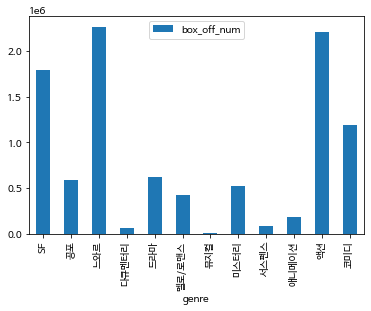

In [32]:
train[['genre','box_off_num']].groupby('genre').mean().plot(kind='bar')

- 느와르가 가장 관객수가 많은 편이고 그 다음으로는 액션, SF, 코메디 순이다. 평균 관객수가 가장 낮은 영화 장르는 뮤지컬이다.

### 예시: 5-2) 영화를 가장 많이 제작하는 배급사 top5?

In [33]:
train['distributor'].value_counts().sort_values(ascending=False)[:5]

CJ 엔터테인먼트    54
롯데엔터테인먼트     52
(주)NEW       30
(주)마운틴픽쳐스    29
(주)쇼박스       26
Name: distributor, dtype: int64

### 예시: 5-3) 영화 개봉 월에 따른 평균 관객수

In [34]:
# 년도, 월, 일, 요일 별 칼럼 따로 만들기
train['release_year']=train['release_time'].dt.year   #년도
train['release_month']=train['release_time'].dt.month   #월
train['release_day']=train['release_time'].dt.day     #일
train['release_weekday']=train['release_time'].dt.weekday   #요일

In [35]:
train[['release_month','box_off_num']].groupby('release_month').mean().sort_values('box_off_num', ascending=False)

,box_off_num
release_month,
1,1365930.6
12,1288247.7
7,1113807.2
8,1029161.7
9,731528.6
2,663025.2
5,575685.2
6,512286.5
11,495653.9


<AxesSubplot:xlabel='release_month'>

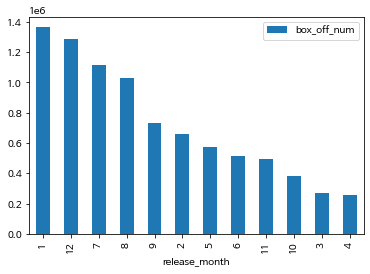

In [36]:
train[['release_month','box_off_num']].groupby('release_month').mean().sort_values('box_off_num', ascending=False).plot(kind='bar')

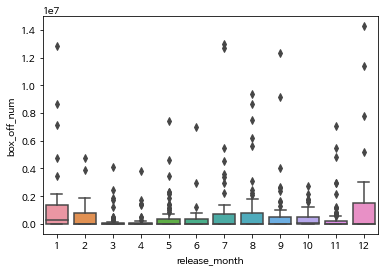

In [37]:
baxplot=plt.subplots()
boxplot=sns.boxplot(x='release_month', y='box_off_num', data=train)

- 월별 평균을 따져봤을 때 1월, 12월, 7월, 8월이 상대적으로 높은 것으로 보아 방학때 개봉하는 영화가 관람객 수가 많다. 